In [118]:
#load packages
import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import datetime as dt
import seaborn as sns

In [119]:
#load datasets
approval1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
approval2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
reg1 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
reg2 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
reg3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [120]:
#load dataset of mrt to street
distfrommrt = pd.read_csv('street_to_MRT1.csv')
distfrommrt = distfrommrt[['street_name','avgdist_nearestMRT']]

In [121]:
#shapes of datasets
print(approval1.shape)
print(approval2.shape)
print(reg1.shape)
print(reg2.shape)
print(reg3.shape)
print(distfrommrt.shape)

(287200, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(92270, 11)
(542, 2)


## Data Cleaning

In [122]:
approval1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [123]:
approval2.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [124]:
reg1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [125]:
reg2.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [126]:
reg3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [127]:
distfrommrt = distfrommrt.dropna()
distfrommrt.isnull().sum()

street_name           0
avgdist_nearestMRT    0
dtype: int64

## Adding missing remaining_lease column to datasets

Since we do not have data for when each house was sold, we cannot get a more accurate value for remaining lease. Thus, we settle for using remaining years of lease in the remaining_lease column.

In [128]:
#add remaining lease column to approval1
date = approval1['month']
date = pd.to_datetime(date)
year_sold = date.dt.year
approval1['year_sold'] = year_sold
approval1['remaining_lease'] = 99 - (approval1['year_sold'] - approval1['lease_commence_date'])
approval1.drop('year_sold',axis='columns', inplace=True)
approval1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,86


In [129]:
#add remaining lease column to approval2
date = approval2['month']
date = pd.to_datetime(date)
year_sold = date.dt.year
approval2['year_sold'] = year_sold
approval2['remaining_lease'] = 99 - (approval2['year_sold'] - approval2['lease_commence_date'])
approval2.drop('year_sold',axis='columns', inplace=True)
approval2.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,85
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,85
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,75


In [130]:
#add remaining lease column to reg1
date = reg1['month']
date = pd.to_datetime(date)
year_sold = date.dt.year
reg1['year_sold'] = year_sold
reg1['remaining_lease'] = 99 - (reg1['year_sold'] - reg1['lease_commence_date'])
reg1.drop('year_sold',axis='columns', inplace=True)
reg1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,67


In [131]:
reg2.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [132]:
reg3['remaining_lease'] = reg3['remaining_lease'].str.split(' ').str[0]
reg3['remaining_lease'] = pd.to_numeric(reg3['remaining_lease'],downcast='integer')
reg3.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0


In [133]:
distfrommrt.head(3)

,street_name,avgdist_nearestMRT
0,ADMIRALTY DR,0.506266
1,ADMIRALTY LINK,0.852994
2,AH HOOD RD,0.651477


In [134]:
#concatenate all the dataframes of houses sold together
frames = [approval1, approval2, reg1, reg2, reg3]
df = pd.concat(frames)
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85


## Adding missing dist_nearestMRT column to datasets

Taking a look at the distfrommrt dataset, it has two columns, street_name and dist_nearestMRT. Initially, it had many duplicate rows for each street_name, with different values for dist_nearestMRT. I assume this is because different blocks on a street are varying distances from the MRT stations. I used pivot table functions in Excel to calculate the average distance from each street to the nearest MRT station.

In [135]:
#add dist_nearestMRT to the 
result = pd.merge(df, distfrommrt, on='street_name', how='left')
df = result
df.sample(n=10, replace=False)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,avgdist_nearestMRT
426514,2004-01,JURONG WEST,4 ROOM,258,BOON LAY DR,13 TO 15,111.0,Model A,1995,264300.0,90,0.859286
313507,2000-10,BUKIT PANJANG,4 ROOM,146,GANGSA RD,07 TO 09,108.0,Model A,1988,241500.0,87,0.428856
154044,1997-04,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,NEW GENERATION,1981,208000.0,83,0.942066
408431,2003-06,HOUGANG,5 ROOM,699,HOUGANG ST 52,10 TO 12,120.0,Improved,1999,335000.0,95,0.693290
821213,2020-07,TAMPINES,5 ROOM,719,TAMPINES ST 72,01 TO 03,119.0,Improved,1997,508000.0,75,1.382779
289797,2000-02,BEDOK,3 ROOM,608,BEDOK RESERVOIR RD,04 TO 06,81.0,New Generation,1982,180500.0,81,1.379600
87406,1995-02,MARINE PARADE,4 ROOM,20,MARINE TER,04 TO 06,88.0,IMPROVED,1975,275000.0,79,1.850225
700220,2014-06,PUNGGOL,5 ROOM,203A,PUNGGOL FIELD,10 TO 12,110.0,Improved,2004,530000.0,89,0.904617
766125,2017-12,PUNGGOL,5 ROOM,207B,PUNGGOL PL,07 TO 09,112.0,Improved,2014,585000.0,95,0.365631
760037,2017-09,BUKIT PANJANG,4 ROOM,175,LOMPANG RD,04 TO 06,101.0,Model A,1997,438000.0,79,0.345338


In [136]:
df.isnull().sum()

month                     0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
remaining_lease           0
avgdist_nearestMRT     4314
dtype: int64

In [137]:
#missing nearest MRT data for the following streets
np.unique(df[df.isnull().any(axis=1)]['street_name'])

array(['ANCHORVALE CRES', 'ANCHORVALE ST', 'ANG MO KIO ST 61',
       'BEDOK RESERVOIR CRES', 'BUANGKOK GREEN', 'CHOA CHU KANG AVE 7',
       'DAWSON RD', 'FERNVALE ST', 'HOUGANG ST 32', 'JURONG WEST CTRL 3',
       'KEAT HONG CL', 'LOR 1A TOA PAYOH', 'MONTREAL LINK', 'NILE RD',
       'PUNGGOL WALK', 'PUNGGOL WAY', 'SENGKANG EAST AVE',
       'SENGKANG WEST WAY', 'SUMANG LINK', 'SUMANG WALK',
       'TAMPINES AVE 1', 'TAMPINES CTRL 8', 'TAMPINES ST 86',
       'TECK WHYE CRES', 'UPP SERANGOON CRES', 'UPP SERANGOON VIEW',
       'YISHUN AVE 1', 'YISHUN ST 31', 'YISHUN ST 51'], dtype=object)

In [138]:
#drop rows with NA and drop duplicate rows as well
df = df.dropna()
df = df.drop_duplicates()
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
avgdist_nearestMRT     0
dtype: int64

In [139]:
#dropping non-important variables
df.drop('month',axis='columns', inplace=True)
df.drop('town',axis='columns', inplace=True)
df.drop('block',axis='columns', inplace=True)
df.drop('street_name',axis='columns', inplace=True)
df.drop('lease_commence_date',axis='columns', inplace=True)

In [140]:
df.head(10)

,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,avgdist_nearestMRT
0,1 ROOM,10 TO 12,31.0,IMPROVED,9000.0,86,0.942066
1,1 ROOM,04 TO 06,31.0,IMPROVED,6000.0,86,0.942066
2,1 ROOM,10 TO 12,31.0,IMPROVED,8000.0,86,0.942066
3,1 ROOM,07 TO 09,31.0,IMPROVED,6000.0,86,0.942066
4,3 ROOM,04 TO 06,73.0,NEW GENERATION,47200.0,85,0.942066
5,3 ROOM,01 TO 03,67.0,NEW GENERATION,46000.0,86,0.699315
6,3 ROOM,07 TO 09,67.0,NEW GENERATION,42000.0,86,0.699315
7,3 ROOM,10 TO 12,67.0,NEW GENERATION,38000.0,86,0.699315
8,3 ROOM,04 TO 06,67.0,NEW GENERATION,40000.0,86,0.699315
9,3 ROOM,01 TO 03,67.0,NEW GENERATION,47000.0,86,0.699315


In [141]:
df.dtypes

flat_type              object
storey_range           object
floor_area_sqm        float64
flat_model             object
resale_price          float64
remaining_lease         int64
avgdist_nearestMRT    float64
dtype: object

## Exploratory Data Analysis

In [142]:
np.unique(df['flat_type'])

array(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [143]:
df.loc[df['flat_type']=='MULTI GENERATION','flat_type'] = "MULTI-GENERATION"
np.unique(df['flat_type'])

array(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [144]:
df.dtypes

flat_type              object
storey_range           object
floor_area_sqm        float64
flat_model             object
resale_price          float64
remaining_lease         int64
avgdist_nearestMRT    float64
dtype: object

In [145]:
flattype_map = {'1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, 
               '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 
                'MULTI-GENERATION' : 7}
df['flattype_label'] = df['flat_type'].map(flattype_map)
df.tail(10)

,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,avgdist_nearestMRT,flattype_label
838467,5 ROOM,07 TO 09,122.0,Improved,467000.0,64,0.698876,5
838468,5 ROOM,10 TO 12,122.0,Improved,508000.0,64,0.332289,5
838469,5 ROOM,01 TO 03,122.0,Improved,450000.0,66,0.417792,5
838470,5 ROOM,01 TO 03,122.0,Improved,502000.0,66,0.417792,5
838471,EXECUTIVE,04 TO 06,146.0,Maisonette,600000.0,66,1.300745,6
838472,EXECUTIVE,10 TO 12,148.0,Maisonette,655000.0,66,1.434293,6
838473,EXECUTIVE,10 TO 12,146.0,Maisonette,650000.0,66,0.749525,6
838474,EXECUTIVE,01 TO 03,146.0,Maisonette,607000.0,66,0.749525,6
838475,EXECUTIVE,01 TO 03,142.0,Apartment,670000.0,66,0.417792,6
838476,EXECUTIVE,07 TO 09,145.0,Maisonette,660000.0,65,0.417792,6


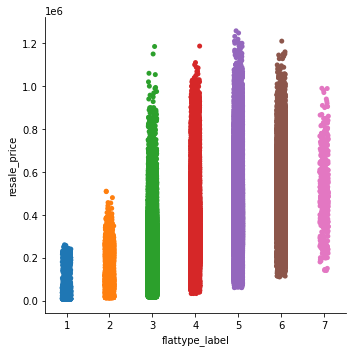

In [146]:
sns.catplot(x='flattype_label', y='resale_price', data=df)

We can see that from as the flat types get 'better', the minimum resale price is increases. Maybe this indicates that the minimum amount people are willing to pay increases as the number of rooms in a flat increase. 

In [147]:
np.unique(df['storey_range'])

array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
       '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
       '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
      dtype=object)

The storey ranges overlap... therefore I just calculated the midpoint storey from each range.

In [148]:
def midpoint(column):
    midpoint_values = []
    for i in range(len(column)):
        left = int(column[i][0:2])
        right = int(column[i][-2:])
        midpoint_values.append((left+right)/2)
    return midpoint_values
        
midpoint(df['storey_range'].unique())
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [149]:
res = dict(zip(df['storey_range'].unique(), midpoint(df['storey_range'].unique())))
res 

{'10 TO 12': 11.0,
 '04 TO 06': 5.0,
 '07 TO 09': 8.0,
 '01 TO 03': 2.0,
 '13 TO 15': 14.0,
 '19 TO 21': 20.0,
 '16 TO 18': 17.0,
 '25 TO 27': 26.0,
 '22 TO 24': 23.0,
 '28 TO 30': 29.0,
 '31 TO 33': 32.0,
 '40 TO 42': 41.0,
 '37 TO 39': 38.0,
 '34 TO 36': 35.0,
 '06 TO 10': 8.0,
 '01 TO 05': 3.0,
 '11 TO 15': 13.0,
 '16 TO 20': 18.0,
 '21 TO 25': 23.0,
 '26 TO 30': 28.0,
 '36 TO 40': 38.0,
 '31 TO 35': 33.0,
 '46 TO 48': 47.0,
 '43 TO 45': 44.0,
 '49 TO 51': 50.0}

In [150]:
storey_map = res
df['storeyrange_label'] = df['storey_range'].map(storey_map)
df.tail(10)

,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,avgdist_nearestMRT,flattype_label,storeyrange_label
838467,5 ROOM,07 TO 09,122.0,Improved,467000.0,64,0.698876,5,8.0
838468,5 ROOM,10 TO 12,122.0,Improved,508000.0,64,0.332289,5,11.0
838469,5 ROOM,01 TO 03,122.0,Improved,450000.0,66,0.417792,5,2.0
838470,5 ROOM,01 TO 03,122.0,Improved,502000.0,66,0.417792,5,2.0
838471,EXECUTIVE,04 TO 06,146.0,Maisonette,600000.0,66,1.300745,6,5.0
838472,EXECUTIVE,10 TO 12,148.0,Maisonette,655000.0,66,1.434293,6,11.0
838473,EXECUTIVE,10 TO 12,146.0,Maisonette,650000.0,66,0.749525,6,11.0
838474,EXECUTIVE,01 TO 03,146.0,Maisonette,607000.0,66,0.749525,6,2.0
838475,EXECUTIVE,01 TO 03,142.0,Apartment,670000.0,66,0.417792,6,2.0
838476,EXECUTIVE,07 TO 09,145.0,Maisonette,660000.0,65,0.417792,6,8.0


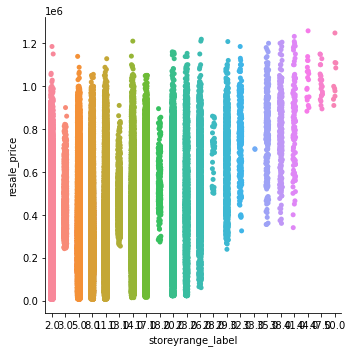

In [151]:
sns.catplot(x='storeyrange_label', y='resale_price', data=df)

The names are repeated, so cleaning involved replacing the names. Could have done this better if I just put all the characters to lowercase though.

In [152]:
df['flat_model'] = df['flat_model'].str.lower()
df['flat_model'].unique()

array(['improved', 'new generation', 'model a', 'standard', 'simplified',
       'model a-maisonette', 'apartment', 'maisonette', 'terrace',
       '2-room', 'improved-maisonette', 'multi generation',
       'premium apartment', 'adjoined flat', 'premium maisonette',
       'model a2', 'dbss', 'type s1', 'type s2', 'premium apartment loft'],
      dtype=object)

In [153]:
df.head(5)

,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,avgdist_nearestMRT,flattype_label,storeyrange_label
0,1 ROOM,10 TO 12,31.0,improved,9000.0,86,0.942066,1,11.0
1,1 ROOM,04 TO 06,31.0,improved,6000.0,86,0.942066,1,5.0
2,1 ROOM,10 TO 12,31.0,improved,8000.0,86,0.942066,1,11.0
3,1 ROOM,07 TO 09,31.0,improved,6000.0,86,0.942066,1,8.0
4,3 ROOM,04 TO 06,73.0,new generation,47200.0,85,0.942066,3,5.0


Actually, it would be interesting if we are able to get data on the number of floors in all HDB blocks. Then instead of looking at storey range, we can look as the percentile of the storey of the flats in their respective blocks. i.e The top floors of every block would be given storey percentile of 100%. This would be a more accurate investigation into how people may be more willing to stay in higher levels because they are quieter and more private. 

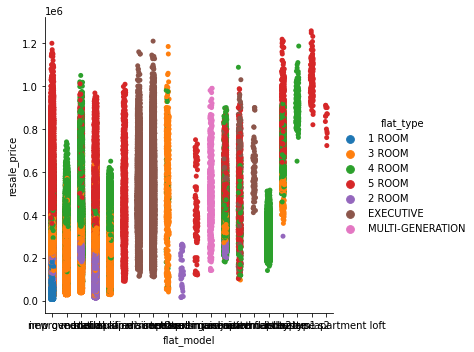

In [154]:
sns.catplot(x='flat_model', y='resale_price',hue='flat_type', data=df)

/Users/a-n-i-s/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


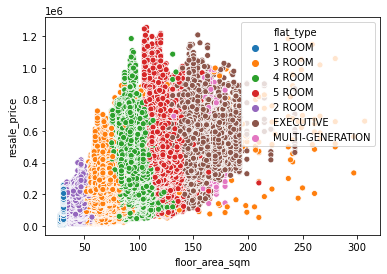

In [155]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=df)

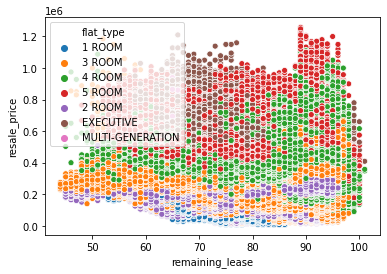

In [156]:
sns.scatterplot(x='remaining_lease', y='resale_price', hue='flat_type', data=df)

I decided to drop flat_model as a variable because I felt that maybe it would overcomplicate the model.

In [157]:
df.columns

Index(['flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'remaining_lease', 'avgdist_nearestMRT',
       'flattype_label', 'storeyrange_label'],
      dtype='object')

In [158]:
#drop flatmodel as a variable because it's too complex at the moment
df.drop('flat_model',axis='columns', inplace=True)

In [159]:
#drop flat_type and storey_range and just use the labels we pre-determined
df.drop('flat_type',axis='columns', inplace=True)
df.drop('storey_range',axis='columns', inplace=True)
df.head(5)

,floor_area_sqm,resale_price,remaining_lease,avgdist_nearestMRT,flattype_label,storeyrange_label
0,31.0,9000.0,86,0.942066,1,11.0
1,31.0,6000.0,86,0.942066,1,5.0
2,31.0,8000.0,86,0.942066,1,11.0
3,31.0,6000.0,86,0.942066,1,8.0
4,73.0,47200.0,85,0.942066,3,5.0


In [160]:
df.dtypes

floor_area_sqm        float64
resale_price          float64
remaining_lease         int64
avgdist_nearestMRT    float64
flattype_label          int64
storeyrange_label     float64
dtype: object

## Train and test sets

In [161]:
df = pd.get_dummies(df, columns=['flattype_label','storeyrange_label'], drop_first=True)
len(df.columns)

31

In [162]:
#separate into independent and dependent values
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'resale_price']
y = df.loc[:, 'resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [163]:
X_train.shape

(582617, 30)

In [164]:
y_train.shape

(582617,)

In [165]:
X_test.shape

(249694, 30)

In [166]:
y_test.shape

(249694,)

## Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [168]:
#To retrieve the intercept:
print(regressor.intercept_)


378886.58558190614


In [169]:
y_reg_pred = regressor.predict(X_test)

In [170]:
df_regpred = pd.DataFrame({'Actual': y_test, 'Predicted': y_reg_pred.flatten()})
df_regpred.sample(10, replace = False)


,Actual,Predicted
8383,102000.0,236097.504180
365038,312000.0,372435.926998
526953,178100.0,254895.707922
717271,475000.0,372647.800049
830146,700000.0,521418.450657
422486,223000.0,326064.292784
113467,240000.0,275702.297626
517078,292000.0,398242.910176
723401,530000.0,462728.396231
725957,398000.0,386268.926391


In [171]:
X_colnames = list(X_train.columns)
df_reg_coef = pd.DataFrame({'Feature': X_colnames, 'Coefficients': regressor.coef_})
df_reg_coef

,Feature,Coefficients
0,floor_area_sqm,1739.869686
1,remaining_lease,-5036.774219
2,avgdist_nearestMRT,-10848.898444
3,flattype_label_2,30280.817780
4,flattype_label_3,67990.757662
5,flattype_label_4,165264.151223
6,flattype_label_5,222911.769907
7,flattype_label_6,279336.598277
8,flattype_label_7,274483.901732
9,storeyrange_label_3.0,120647.154475


In [172]:
#r-squared score
sklearn.metrics.r2_score(y_test, y_reg_pred)

0.5589379264835455

In [173]:
#find root mean squared error
from sklearn.metrics import mean_squared_error
import math
rmse_reg = math.sqrt(mean_squared_error(y_test,y_reg_pred)) #calculate rmse
rmse_reg

99250.11891357515

## XGBoost

In [174]:
import xgboost as xgb
df_xgb = xgb.DMatrix(data=X,label=y)
xgb_regression = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 500, alpha = 10, n_estimators = 100)
xgb_regression.fit(X_train, y_train)

[15:24:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=500,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [175]:
y_xgb_pred = xgb_regression.predict(X_test)

In [176]:
df_xgbreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred.flatten()})
df_xgbreg.sample(10, replace=False)

,Actual,Predicted
140855,280000.0,215235.312500
639182,403000.0,376263.406250
21695,65000.0,144094.500000
472208,164000.0,166815.625000
163766,294000.0,261164.734375
100757,130000.0,133369.125000
164013,378000.0,330873.406250
237540,145000.0,148354.765625
576969,353000.0,354763.625000
295109,297000.0,279347.062500


In [177]:
#find r_squared
sklearn.metrics.r2_score(y_test, y_xgb_pred)

0.9111113868124732

In [178]:
#find root mean squared error
rmse_xgb = math.sqrt(mean_squared_error(y_test,y_xgb_pred)) #calculate rmse
rmse_xgb

44555.79977207787

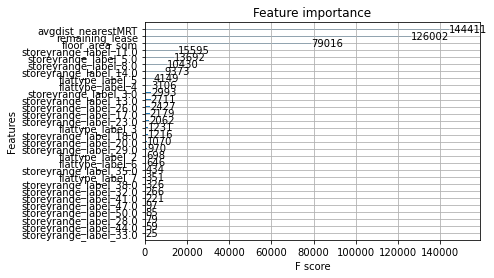

In [183]:
import matplotlib.pyplot as plt
#see the importance of each variable
xgb.plot_importance(xgb_regression)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Cross-validation for XGBoost

In [184]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 500, 'alpha': 10}

cv_results = xgb.cv(dtrain=df_xgb, params=params, nfold=10,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:32:21] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:24] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:25] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:29] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:35] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:39] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is no

In [185]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
99,43772.423437,4185.551023,46851.072265,3575.896447


## K-Nearest Neighbours

In [188]:
math.sqrt(len(X_train))

763.2935215236665

In [189]:
math.sqrt(len(X_test))

499.6939063066509

In [190]:
math.sqrt(len(X))

912.3108023036887

In [195]:
k = 750
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [196]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=k, weights='distance', p=1)
KNN.fit(X_train_std, y_train) 

KNeighborsRegressor(n_neighbors=750, p=1, weights='distance')

In [197]:
y_knn_pred = KNN.predict(X_test_std)

In [198]:
df_knn_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_knn_pred.flatten()})
df_knn_pred

,Actual,Predicted
641888,675000.0,600836.936470
222518,380000.0,333666.666667
237065,118300.0,118000.000000
109199,510000.0,377000.000000
50030,165000.0,297070.616898
...,...,...
626140,313000.0,307666.666667
460492,170000.0,181375.000000
44497,182000.0,147666.666667
699668,448000.0,420000.000000


In [199]:
rmse_knn = math.sqrt(mean_squared_error(y_test,y_knn_pred)) #calculate rmse
rmse_knn

64953.35308221754